## Final Project Submission

Please fill out:
* Student name: Victor Kang
* Student pace: **self paced** / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
# Your code here - remember to use markdown cells for comments as well!

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("data/kc_house_data.csv")

In [4]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [6]:
df["grade"]

0            7 Average
1            7 Average
2        6 Low Average
3            7 Average
4               8 Good
             ...      
21592           8 Good
21593           8 Good
21594        7 Average
21595           8 Good
21596        7 Average
Name: grade, Length: 21597, dtype: object

In [7]:
df["grade"].value_counts()

7 Average        8974
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64

In [8]:
df["condition"]

0          Average
1          Average
2          Average
3        Very Good
4          Average
           ...    
21592      Average
21593      Average
21594      Average
21595      Average
21596      Average
Name: condition, Length: 21597, dtype: object

In [9]:
df["condition"].value_counts()

Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: condition, dtype: int64

BUILDING CONDITION
    	Relative to age and grade. Coded 1-5.

1 = Poor- Worn out. Repair and overhaul needed on painted surfaces, roofing, plumbing, heating and numerous functional inadequacies. Excessive deferred maintenance and abuse, limited value-in-use, approaching abandonment or major reconstruction; reuse or change in occupancy is imminent. Effective age is near the end of the scale regardless of the actual chronological age.

2 = Fair- Badly worn. Much repair needed. Many items need refinishing or overhauling, deferred maintenance obvious, inadequate building utility and systems all shortening the life expectancy and increasing the effective age.

3 = Average- Some evidence of deferred maintenance and normal obsolescence with age in that a few minor repairs are needed, along with some refinishing. All major components still functional and contributing toward an extended life expectancy. Effective age and utility is standard for like properties of its class and usage.

4 = Good- No obvious maintenance required but neither is everything new. Appearance and utility are above the standard and the overall effective age will be lower than the typical property.

5= Very Good- All items well maintained, many having been overhauled and repaired as they have shown signs of wear, increasing the life expectancy and lowering the effective age with little deterioration or obsolescence evident with a high degree of utility.



BUILDING GRADE
    	Represents the construction quality of improvements. Grades run from grade 1 to 13. 
        Generally defined as:

1-3 Falls short of minimum building standards. Normally cabin or inferior structure.

4 Generally older, low quality construction. Does not meet code.

5 Low construction costs and workmanship. Small, simple design.

6 Lowest grade currently meeting building code. Low quality materials and simple designs.

7 Average grade of construction and design. Commonly seen in plats and older sub-divisions.

8 Just above average in construction and design. Usually better materials in both the exterior and interior finish work.

9 Better architectural design with extra interior and exterior design and quality.

10 Homes of this quality generally have high quality features. Finish work is better and more design quality is seen in the floor plans. Generally have a larger square footage.

11 Custom design and higher quality finish work with added amenities of solid woods, bathroom fixtures and more luxurious options.

12 Custom design and excellent builders. All materials are of the highest quality and all conveniences are present.

13 Generally custom designed and built. Mansion level. Large amount of highest quality cabinet work, wood trim, marble, entry ways etc.

In [10]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [11]:
df = df.drop(['id', 'view', 'zipcode','lat', 'long','sqft_living15','sqft_lot15' ], axis=1)
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,Average,7 Average,1180,0.0,1955,0.0
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,Average,7 Average,2170,400.0,1951,1991.0
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,Average,6 Low Average,770,0.0,1933,NaN
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,Very Good,7 Average,1050,910.0,1965,0.0
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,Average,8 Good,1680,0.0,1987,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,Average,8 Good,1530,0.0,2009,0.0
21593,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,Average,8 Good,2310,0.0,2014,0.0
21594,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,Average,7 Average,1020,0.0,2009,0.0
21595,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,Average,8 Good,1600,0.0,2004,0.0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           21597 non-null  object 
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     19221 non-null  object 
 8   condition      21597 non-null  object 
 9   grade          21597 non-null  object 
 10  sqft_above     21597 non-null  int64  
 11  sqft_basement  21597 non-null  object 
 12  yr_built       21597 non-null  int64  
 13  yr_renovated   17755 non-null  float64
dtypes: float64(4), int64(5), object(5)
memory usage: 2.3+ MB


In [13]:
df['date'] = pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           21597 non-null  datetime64[ns]
 1   price          21597 non-null  float64       
 2   bedrooms       21597 non-null  int64         
 3   bathrooms      21597 non-null  float64       
 4   sqft_living    21597 non-null  int64         
 5   sqft_lot       21597 non-null  int64         
 6   floors         21597 non-null  float64       
 7   waterfront     19221 non-null  object        
 8   condition      21597 non-null  object        
 9   grade          21597 non-null  object        
 10  sqft_above     21597 non-null  int64         
 11  sqft_basement  21597 non-null  object        
 12  yr_built       21597 non-null  int64         
 13  yr_renovated   17755 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(5), object(4)
memory usage: 2.

In [14]:
df['month_sold'] = df['date'].dt.month
df['year_sold'] = df['date'].dt.year
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,month_sold,year_sold
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NaN,Average,7 Average,1180,0.0,1955,0.0,10,2014
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,NO,Average,7 Average,2170,400.0,1951,1991.0,12,2014
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,NO,Average,6 Low Average,770,0.0,1933,NaN,2,2015
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,NO,Very Good,7 Average,1050,910.0,1965,0.0,12,2014
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,NO,Average,8 Good,1680,0.0,1987,0.0,2,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,2014-05-21,360000.0,3,2.50,1530,1131,3.0,NO,Average,8 Good,1530,0.0,2009,0.0,5,2014
21593,2015-02-23,400000.0,4,2.50,2310,5813,2.0,NO,Average,8 Good,2310,0.0,2014,0.0,2,2015
21594,2014-06-23,402101.0,2,0.75,1020,1350,2.0,NO,Average,7 Average,1020,0.0,2009,0.0,6,2014
21595,2015-01-16,400000.0,3,2.50,1600,2388,2.0,NaN,Average,8 Good,1600,0.0,2004,0.0,1,2015


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           21597 non-null  datetime64[ns]
 1   price          21597 non-null  float64       
 2   bedrooms       21597 non-null  int64         
 3   bathrooms      21597 non-null  float64       
 4   sqft_living    21597 non-null  int64         
 5   sqft_lot       21597 non-null  int64         
 6   floors         21597 non-null  float64       
 7   waterfront     19221 non-null  object        
 8   condition      21597 non-null  object        
 9   grade          21597 non-null  object        
 10  sqft_above     21597 non-null  int64         
 11  sqft_basement  21597 non-null  object        
 12  yr_built       21597 non-null  int64         
 13  yr_renovated   17755 non-null  float64       
 14  month_sold     21597 non-null  int64         
 15  year_sold      2159

In [16]:
df['age_when_sold'] = df['year_sold'] - df['yr_built']
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,month_sold,year_sold,age_when_sold
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NaN,Average,7 Average,1180,0.0,1955,0.0,10,2014,59
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,NO,Average,7 Average,2170,400.0,1951,1991.0,12,2014,63
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,NO,Average,6 Low Average,770,0.0,1933,NaN,2,2015,82
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,NO,Very Good,7 Average,1050,910.0,1965,0.0,12,2014,49
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,NO,Average,8 Good,1680,0.0,1987,0.0,2,2015,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,2014-05-21,360000.0,3,2.50,1530,1131,3.0,NO,Average,8 Good,1530,0.0,2009,0.0,5,2014,5
21593,2015-02-23,400000.0,4,2.50,2310,5813,2.0,NO,Average,8 Good,2310,0.0,2014,0.0,2,2015,1
21594,2014-06-23,402101.0,2,0.75,1020,1350,2.0,NO,Average,7 Average,1020,0.0,2009,0.0,6,2014,5
21595,2015-01-16,400000.0,3,2.50,1600,2388,2.0,NaN,Average,8 Good,1600,0.0,2004,0.0,1,2015,11


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           21597 non-null  datetime64[ns]
 1   price          21597 non-null  float64       
 2   bedrooms       21597 non-null  int64         
 3   bathrooms      21597 non-null  float64       
 4   sqft_living    21597 non-null  int64         
 5   sqft_lot       21597 non-null  int64         
 6   floors         21597 non-null  float64       
 7   waterfront     19221 non-null  object        
 8   condition      21597 non-null  object        
 9   grade          21597 non-null  object        
 10  sqft_above     21597 non-null  int64         
 11  sqft_basement  21597 non-null  object        
 12  yr_built       21597 non-null  int64         
 13  yr_renovated   17755 non-null  float64       
 14  month_sold     21597 non-null  int64         
 15  year_sold      2159

In [18]:
df['sqft_living']

0        1180
1        2570
2         770
3        1960
4        1680
         ... 
21592    1530
21593    2310
21594    1020
21595    1600
21596    1020
Name: sqft_living, Length: 21597, dtype: int64

In [19]:
df[['sqft_living','sqft_lot','sqft_above','sqft_basement']].head(50)

,sqft_living,sqft_lot,sqft_above,sqft_basement
0,1180,5650,1180,0.0
1,2570,7242,2170,400.0
2,770,10000,770,0.0
3,1960,5000,1050,910.0
4,1680,8080,1680,0.0
5,5420,101930,3890,1530.0
6,1715,6819,1715,?
7,1060,9711,1060,0.0
8,1780,7470,1050,730.0
9,1890,6560,1890,0.0


In [20]:
df.loc[df['sqft_basement'] == '?'][['sqft_living','sqft_lot','sqft_above','sqft_basement']].head(50)

,sqft_living,sqft_lot,sqft_above,sqft_basement
6,1715,6819,1715,?
18,1200,9850,1200,?
42,3595,5639,3595,?
79,3450,39683,3450,?
112,1540,12600,1160,?
115,4380,6350,2780,?
217,2250,5692,2250,?
309,3320,10574,2220,?
384,4800,14984,3480,?
508,1540,6872,820,?


In [21]:
df['sqft_basement'].value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
1920.0        1
3480.0        1
2730.0        1
2720.0        1
248.0         1
Name: sqft_basement, Length: 304, dtype: int64

In [22]:
#df['sqft_basement'] = df['sqft_basement'].map(lambda x: df['sqft_living'] - df['sqft_above'] if x == '?' else x)

for x in df['sqft_basement']:
    if x == '?':
        df['sqft_basement'] = df['sqft_living'] - df['sqft_above'] 



In [23]:
df['sqft_basement'].value_counts()

0      13110
600      221
700      218
500      214
800      206
       ...  
518        1
374        1
784        1
906        1
248        1
Name: sqft_basement, Length: 306, dtype: int64

In [24]:
df[['sqft_living','sqft_lot','sqft_above','sqft_basement']].head(50)

,sqft_living,sqft_lot,sqft_above,sqft_basement
0,1180,5650,1180,0
1,2570,7242,2170,400
2,770,10000,770,0
3,1960,5000,1050,910
4,1680,8080,1680,0
5,5420,101930,3890,1530
6,1715,6819,1715,0
7,1060,9711,1060,0
8,1780,7470,1050,730
9,1890,6560,1890,0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           21597 non-null  datetime64[ns]
 1   price          21597 non-null  float64       
 2   bedrooms       21597 non-null  int64         
 3   bathrooms      21597 non-null  float64       
 4   sqft_living    21597 non-null  int64         
 5   sqft_lot       21597 non-null  int64         
 6   floors         21597 non-null  float64       
 7   waterfront     19221 non-null  object        
 8   condition      21597 non-null  object        
 9   grade          21597 non-null  object        
 10  sqft_above     21597 non-null  int64         
 11  sqft_basement  21597 non-null  int64         
 12  yr_built       21597 non-null  int64         
 13  yr_renovated   17755 non-null  float64       
 14  month_sold     21597 non-null  int64         
 15  year_sold      2159

In [26]:
df['waterfront'].value_counts()

NO     19075
YES      146
Name: waterfront, dtype: int64

In [27]:
df['yr_renovated'].value_counts()

0.0       17011
2014.0       73
2013.0       31
2003.0       31
2007.0       30
          ...  
1951.0        1
1953.0        1
1946.0        1
1976.0        1
1948.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [28]:
df['waterfront'].isna().sum()

2376

In [29]:
df['waterfront'].fillna('NO', inplace=True)
df['waterfront'].value_counts()

NO     21451
YES      146
Name: waterfront, dtype: int64

In [30]:
df['waterfront'] = df['waterfront'].map(lambda x: True if x == 'YES' else False)
df['waterfront'].value_counts()

False    21451
True       146
Name: waterfront, dtype: int64

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           21597 non-null  datetime64[ns]
 1   price          21597 non-null  float64       
 2   bedrooms       21597 non-null  int64         
 3   bathrooms      21597 non-null  float64       
 4   sqft_living    21597 non-null  int64         
 5   sqft_lot       21597 non-null  int64         
 6   floors         21597 non-null  float64       
 7   waterfront     21597 non-null  bool          
 8   condition      21597 non-null  object        
 9   grade          21597 non-null  object        
 10  sqft_above     21597 non-null  int64         
 11  sqft_basement  21597 non-null  int64         
 12  yr_built       21597 non-null  int64         
 13  yr_renovated   17755 non-null  float64       
 14  month_sold     21597 non-null  int64         
 15  year_sold      2159

In [32]:
df['yr_renovated'].isna().sum()

3842

In [33]:
def reno(year):
    if year > 1999:
        return True
    else:
        return False

df['recent_reno']  = df['yr_renovated'].apply(reno)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           21597 non-null  datetime64[ns]
 1   price          21597 non-null  float64       
 2   bedrooms       21597 non-null  int64         
 3   bathrooms      21597 non-null  float64       
 4   sqft_living    21597 non-null  int64         
 5   sqft_lot       21597 non-null  int64         
 6   floors         21597 non-null  float64       
 7   waterfront     21597 non-null  bool          
 8   condition      21597 non-null  object        
 9   grade          21597 non-null  object        
 10  sqft_above     21597 non-null  int64         
 11  sqft_basement  21597 non-null  int64         
 12  yr_built       21597 non-null  int64         
 13  yr_renovated   17755 non-null  float64       
 14  month_sold     21597 non-null  int64         
 15  year_sold      2159

In [35]:
df['recent_reno'].sum()

379

In [36]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,month_sold,year_sold,age_when_sold,recent_reno
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,False,Average,7 Average,1180,0,1955,0.0,10,2014,59,False
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,False,Average,7 Average,2170,400,1951,1991.0,12,2014,63,False
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,False,Average,6 Low Average,770,0,1933,NaN,2,2015,82,False
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,False,Very Good,7 Average,1050,910,1965,0.0,12,2014,49,False
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,False,Average,8 Good,1680,0,1987,0.0,2,2015,28,False


In [37]:
df = df.drop(['date', 'yr_built','yr_renovated' ], axis=1)
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,month_sold,year_sold,age_when_sold,recent_reno
0,221900.0,3,1.00,1180,5650,1.0,False,Average,7 Average,1180,0,10,2014,59,False
1,538000.0,3,2.25,2570,7242,2.0,False,Average,7 Average,2170,400,12,2014,63,False
2,180000.0,2,1.00,770,10000,1.0,False,Average,6 Low Average,770,0,2,2015,82,False
3,604000.0,4,3.00,1960,5000,1.0,False,Very Good,7 Average,1050,910,12,2014,49,False
4,510000.0,3,2.00,1680,8080,1.0,False,Average,8 Good,1680,0,2,2015,28,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,False,Average,8 Good,1530,0,5,2014,5,False
21593,400000.0,4,2.50,2310,5813,2.0,False,Average,8 Good,2310,0,2,2015,1,False
21594,402101.0,2,0.75,1020,1350,2.0,False,Average,7 Average,1020,0,6,2014,5,False
21595,400000.0,3,2.50,1600,2388,2.0,False,Average,8 Good,1600,0,1,2015,11,False


In [38]:
df['condition'].value_counts()

Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: condition, dtype: int64

In [39]:
df['grade'].value_counts()

7 Average        8974
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64

In [40]:
condition_key = {'Poor':1.0 , 'Fair':2.0 , 'Average':3.0 , 'Good':4.0 , 'Very Good':5.0}

In [41]:
grade_key = {'3 Poor':3.0,
             '4 Low':4.0,
             '5 Fair':5.0,
             '6 Low Average':6.0,
             '7 Average': 7.0,
             '8 Good':8.0,
             '9 Better':9.0,
             '10 Very Good':10.0,
             '11 Excellent':11.0,
             '12 Luxury': 12.0,
             '13 Mansion':13.0}

In [46]:
df['condition'] = df['condition'].replace(condition_key)

In [49]:
df['grade'] = df['grade'].replace(grade_key)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   bedrooms       21597 non-null  int64  
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  int64  
 4   sqft_lot       21597 non-null  int64  
 5   floors         21597 non-null  float64
 6   waterfront     21597 non-null  bool   
 7   condition      21597 non-null  float64
 8   grade          21597 non-null  float64
 9   sqft_above     21597 non-null  int64  
 10  sqft_basement  21597 non-null  int64  
 11  month_sold     21597 non-null  int64  
 12  year_sold      21597 non-null  int64  
 13  age_when_sold  21597 non-null  int64  
 14  recent_reno    21597 non-null  bool   
dtypes: bool(2), float64(5), int64(8)
memory usage: 2.2 MB


In [48]:
df['condition'].value_counts()

3.0    14020
4.0     5677
5.0     1701
2.0      170
1.0       29
Name: condition, dtype: int64

In [51]:
df['grade'].value_counts()

7.0     8974
8.0     6065
9.0     2615
6.0     2038
10.0    1134
11.0     399
5.0      242
12.0      89
4.0       27
13.0      13
3.0        1
Name: grade, dtype: int64

In [52]:
import numpy as np

import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [54]:
df['price'].max()

7700000.0

In [67]:
df['bedrooms'].sort_values(ascending=False).head(10)

15856    33
8748     11
13301    10
19239    10
15147    10
6073      9
4231      9
16830     9
8537      9
4092      9
Name: bedrooms, dtype: int64

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,month_sold,year_sold,age_when_sold,recent_reno
0,221900.0,3,1.00,1180,5650,1.0,False,3.0,7.0,1180,0,10,2014,59,False
1,538000.0,3,2.25,2570,7242,2.0,False,3.0,7.0,2170,400,12,2014,63,False
2,180000.0,2,1.00,770,10000,1.0,False,3.0,6.0,770,0,2,2015,82,False
3,604000.0,4,3.00,1960,5000,1.0,False,5.0,7.0,1050,910,12,2014,49,False
4,510000.0,3,2.00,1680,8080,1.0,False,3.0,8.0,1680,0,2,2015,28,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,False,3.0,8.0,1530,0,5,2014,5,False
21593,400000.0,4,2.50,2310,5813,2.0,False,3.0,8.0,2310,0,2,2015,1,False
21594,402101.0,2,0.75,1020,1350,2.0,False,3.0,7.0,1020,0,6,2014,5,False
21595,400000.0,3,2.50,1600,2388,2.0,False,3.0,8.0,1600,0,1,2015,11,False


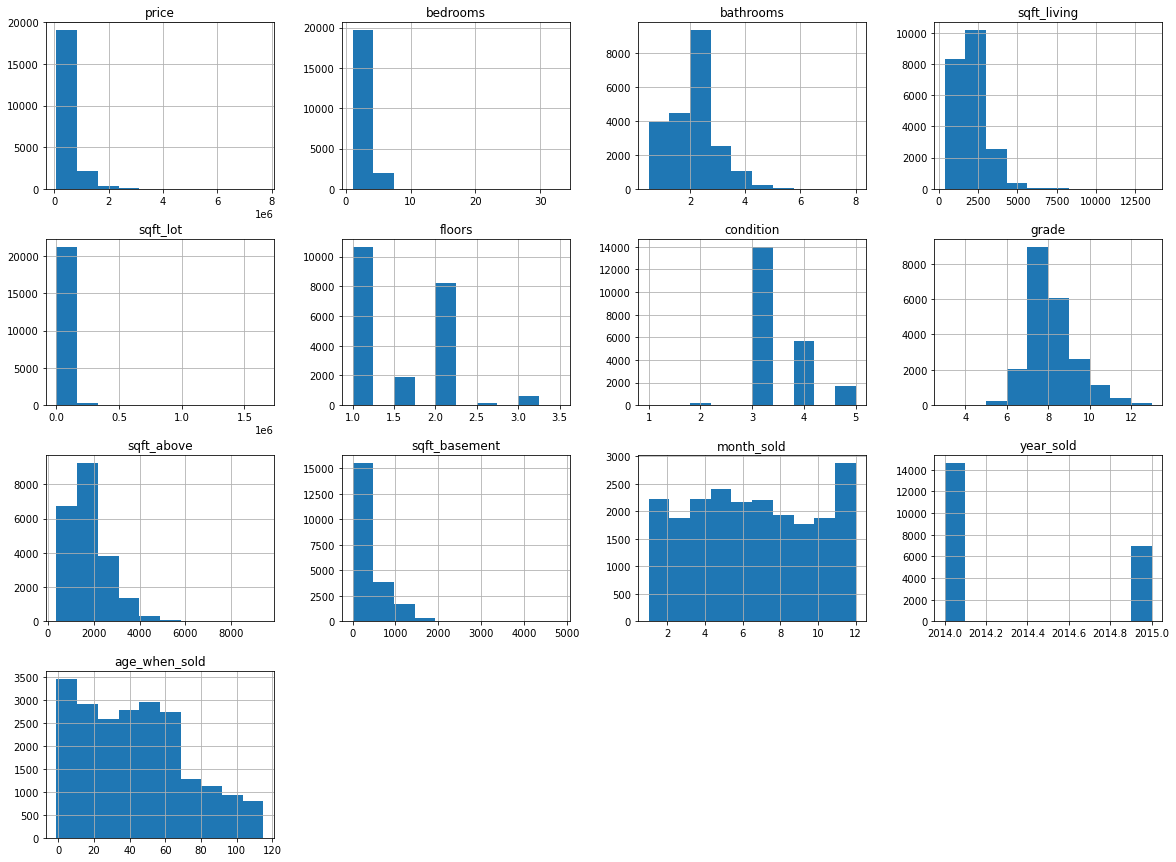

In [53]:
df.hist(figsize = (20,15));